In [1]:
!nvidia-smi

Thu Feb 29 00:21:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   51C    P3             41W /  170W |    2682MiB /  12288MiB |     34%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Model checkpoints has been gitignored, so you need to download them from the following link:
# https://github.com/facebookresearch/segment-anything#model-checkpoints
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry, SamPredictor
from PIL import Image
import numpy as np
import torch
import cv2
import supervision as sv

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
sam = sam_model_registry[MODEL_TYPE](checkpoint="sam_vit_h_4b8939.pth").to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)

In [3]:
image34_bgr = cv2.imread('inputPics/day34.png')
image34_rgb = cv2.cvtColor(image34_bgr, cv2.COLOR_BGR2RGB)
sam_result34 = mask_generator.generate(image34_rgb)

In [4]:
image35_bgr = cv2.imread('inputPics/day35.png')
image35_rgb = cv2.cvtColor(image35_bgr, cv2.COLOR_BGR2RGB)
sam_result35 = mask_generator.generate(image35_rgb)

In [5]:
image36_bgr = cv2.imread('inputPics/day36.png')
image36_rgb = cv2.cvtColor(image36_bgr, cv2.COLOR_BGR2RGB)
sam_result36 = mask_generator.generate(image36_rgb)

In [6]:
image37_bgr = cv2.imread('inputPics/day37.png')
image37_rgb = cv2.cvtColor(image37_bgr, cv2.COLOR_BGR2RGB)
sam_result37 = mask_generator.generate(image37_rgb)

In [7]:
image38_bgr = cv2.imread('inputPics/day38.png')
image38_rgb = cv2.cvtColor(image38_bgr, cv2.COLOR_BGR2RGB)
sam_result38 = mask_generator.generate(image38_rgb)

In [8]:
image39_bgr = cv2.imread('inputPics/day39.png')
image39_rgb = cv2.cvtColor(image39_bgr, cv2.COLOR_BGR2RGB)
sam_result39 = mask_generator.generate(image39_rgb)

In [9]:
image40_bgr = cv2.imread('inputPics/day40.png')
image40_rgb = cv2.cvtColor(image40_bgr, cv2.COLOR_BGR2RGB)
sam_result40 = mask_generator.generate(image40_rgb)

In [10]:
image41_bgr = cv2.imread('inputPics/day41.png')
image41_rgb = cv2.cvtColor(image41_bgr, cv2.COLOR_BGR2RGB)
sam_result41 = mask_generator.generate(image41_rgb)

In [11]:
image42_bgr = cv2.imread('inputPics/day42.png')
image42_rgb = cv2.cvtColor(image42_bgr, cv2.COLOR_BGR2RGB)
sam_result42 = mask_generator.generate(image42_rgb)

In [12]:
image43_bgr = cv2.imread('inputPics/day43.png')
image43_rgb = cv2.cvtColor(image43_bgr, cv2.COLOR_BGR2RGB)
sam_result43 = mask_generator.generate(image43_rgb)

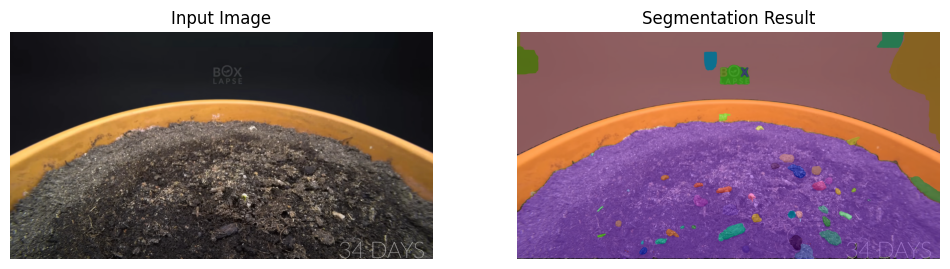

In [13]:
mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
detections = sv.Detections.from_sam(sam_result = sam_result34)
annotated_image = mask_annotator.annotate(scene=image34_bgr.copy(), detections = detections)
sv.plot_images_grid(
  images = [image34_bgr, annotated_image],
  grid_size=(1, 2),
  titles = ["Input Image", "Segmentation Result"]
)